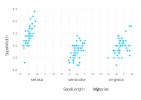

In [1]:
using Gadfly, RDatasets
iris = dataset("datasets", "iris")
plot(iris, xgroup="Species", x="SepalLength", y="SepalWidth",
     Geom.subplot_grid(Geom.point))

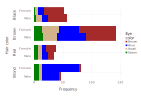

In [2]:
haireye = dataset("datasets", "HairEyeColor")
palette = ["brown", "blue", "tan", "green"]

plot(haireye, y=:Sex, x=:Freq, color=:Eye, ygroup=:Hair,
    Geom.subplot_grid(Geom.bar(position=:stack, orientation=:horizontal),
        Guide.ylabel(orientation=:vertical) ),
    Scale.color_discrete_manual(palette...),
    Guide.colorkey(title="Eye\ncolor"),
    Guide.ylabel("Hair color"), Guide.xlabel("Frequency") )

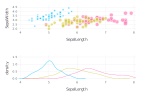

In [3]:
theme1 = Theme(key_position=:none)
fig1a = plot(iris, x=:SepalLength, y=:SepalWidth, color=:Species, theme1,
          alpha=[0.6], size=:PetalLength, Scale.size_area(maxvalue=7))
fig1b = plot(iris, x=:SepalLength, color=:Species, Geom.density,
          Guide.ylabel("density"), Coord.cartesian(xmin=4, xmax=8), theme1)
vstack(fig1a,fig1b)

In [4]:
using Compose # for w, h relative units
fig1c = plot(iris, x=:SepalWidth, color=:Species, Geom.density,
          Guide.ylabel("density"), Coord.cartesian(xmin=2, xmax=4.5), theme1)
fig1d = plot(iris, color=:Species, size=:PetalLength, Geom.blank,
          Scale.size_area(maxvalue=7), Theme(key_swatch_color="silver"),
          Guide.colorkey(title="Species", pos=[0.55w,-0.15h]),
          Guide.sizekey(title="PetalLength (cm)", pos=[0.2w, -0.10h]))
gridstack([fig1a fig1c; fig1b fig1d])

LoadError: ArgumentError: Package Compose not found in current path:
- Run `import Pkg; Pkg.add("Compose")` to install the Compose package.


In [5]:
vstack(hstack(fig1a, fig1b),hstack(fig1a,fig1b,fig1c,fig1d))

LoadError: UndefVarError: fig1c not defined

In [6]:
gridstack([fig1a fig1c; fig1b fig1d])

LoadError: UndefVarError: fig1c not defined

In [7]:
title(hstack(fig1a,fig1c), "My creative title")

LoadError: UndefVarError: fig1c not defined

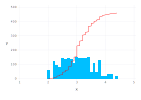

In [8]:
xdata = sort(iris.SepalWidth)
ydata = cumsum(xdata)
line = layer(x=xdata, y=ydata, Geom.line, color=[colorant"red"],
    Theme(line_width=1pt))
bars = layer(iris, x=:SepalWidth, Geom.bar)
plot(line, bars)

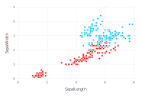

In [9]:
plot(iris,
     layer(x=:SepalLength, y=:SepalWidth),
     layer(x=:PetalLength, y=:PetalWidth, color=[colorant"red"]))

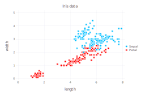

In [10]:
plot(iris,
     layer(x=:SepalLength, y=:SepalWidth),
     layer(x=:PetalLength, y=:PetalWidth, color=[colorant"red"]),
     Guide.xlabel("length"), Guide.ylabel("width"), Guide.title("Iris data"),
     Guide.manual_color_key("",["Sepal","Petal"],
                            [Gadfly.current_theme().default_color,"red"]))

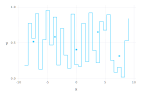

In [11]:
xdata = range(-9, 9, length=30)
plot(x=xdata, y=rand(30), Geom.point, Stat.binmean(n=5), Geom.line, Stat.step)

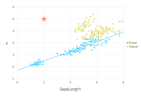

In [12]:
plot(iris, Guide.colorkey(title=""),
    layer(x->0.4x-0.3, 0, 8, color=["Petal"]),
    layer(x=:SepalLength, y=:SepalWidth, color=["Sepal"]),
    layer(x=:PetalLength, y=:PetalWidth, color=["Petal"]),
    layer(x=[2.0], y=[4], shape=[Shape.star1], color=[colorant"red"], size=[8pt]),
    Theme(alphas=[0.7]))

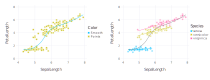

In [13]:
set_default_plot_size(21cm, 8cm)
p1 = plot(iris, x=:SepalLength, y=:PetalLength,
    layer(Geom.smooth(method=:loess), color=["Smooth"]),
    layer(Geom.point, color=["Points"]))

p2 = plot(iris, x=:SepalLength, y=:PetalLength, color=:Species,
    Geom.smooth(method=:lm), Geom.point, alpha=[0.6],
    layer(Geom.smooth(method=:loess), color=[colorant"grey"], order=2))
hstack(p1, p2)